In [2]:
%matplotlib inline


# Robust covariance estimation and Mahalanobis distances relevance


An example to show covariance estimation with the Mahalanobis
distances on Gaussian distributed data.

For Gaussian distributed data, the distance of an observation
$x_i$ to the mode of the distribution can be computed using its
Mahalanobis distance: $d_{(\mu,\Sigma)}(x_i)^2 = (x_i -
\mu)'\Sigma^{-1}(x_i - \mu)$ where $\mu$ and $\Sigma$ are
the location and the covariance of the underlying Gaussian
distribution.

In practice, $\mu$ and $\Sigma$ are replaced by some
estimates.  The usual covariance maximum likelihood estimate is very
sensitive to the presence of outliers in the data set and therefor,
the corresponding Mahalanobis distances are. One would better have to
use a robust estimator of covariance to guarantee that the estimation is
resistant to "erroneous" observations in the data set and that the
associated Mahalanobis distances accurately reflect the true
organisation of the observations.

The Minimum Covariance Determinant estimator is a robust,
high-breakdown point (i.e. it can be used to estimate the covariance
matrix of highly contaminated datasets, up to
$\frac{n_\text{samples}-n_\text{features}-1}{2}$ outliers)
estimator of covariance. The idea is to find
$\frac{n_\text{samples}+n_\text{features}+1}{2}$
observations whose empirical covariance has the smallest determinant,
yielding a "pure" subset of observations from which to compute
standards estimates of location and covariance.

The Minimum Covariance Determinant estimator (MCD) has been introduced
by P.J.Rousseuw in [1].

This example illustrates how the Mahalanobis distances are affected by
outlying data: observations drawn from a contaminating distribution
are not distinguishable from the observations coming from the real,
Gaussian distribution that one may want to work with. Using MCD-based
Mahalanobis distances, the two populations become
distinguishable. Associated applications are outliers detection,
observations ranking, clustering, ...
For visualization purpose, the cubic root of the Mahalanobis distances
are represented in the boxplot, as Wilson and Hilferty suggest [2]

[1] P. J. Rousseeuw. Least median of squares regression. J. Am
    Stat Ass, 79:871, 1984.
[2] Wilson, E. B., & Hilferty, M. M. (1931). The distribution of chi-square.
    Proceedings of the National Academy of Sciences of the United States
    of America, 17, 684-688.




Automatically created module for IPython interactive environment


([], <a list of 0 Text yticklabel objects>)

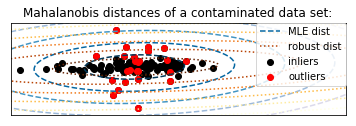

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 125
n_outliers = 25
n_features = 2

# generate data
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

# #############################################################################
# Display results
fig = plt.figure()
plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

# Show data set
subfig1 = plt.subplot(3, 1, 1)
inlier_plot = subfig1.scatter(X[:, 0], X[:, 1], color='black', label='inliers')
outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:], color='red', label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['MLE dist', 'robust dist', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())

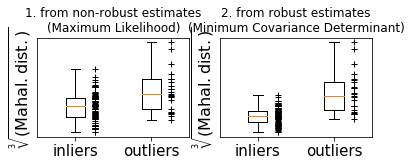

In [6]:
# Plot the scores for each point
emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
subfig2 = plt.subplot(2, 2, 3)
subfig2.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
subfig2.plot(1.26 * np.ones(n_samples - n_outliers),
             emp_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig2.plot(2.26 * np.ones(n_outliers),
             emp_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig2.set_title("1. from non-robust estimates\n(Maximum Likelihood)")
plt.yticks(())

robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
subfig3 = plt.subplot(2, 2, 4)
subfig3.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
                widths=.25)
subfig3.plot(1.26 * np.ones(n_samples - n_outliers),
             robust_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig3.plot(2.26 * np.ones(n_outliers),
             robust_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig3.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig3.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig3.set_title("2. from robust estimates\n(Minimum Covariance Determinant)")
plt.yticks(())

plt.show()